<a href="https://colab.research.google.com/github/rjnakano/manejo-inventarios-pdg/blob/main/KMeans(COSTX_QTYVAR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# k-means clustering
from sklearn.cluster import KMeans

In [26]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
data1 = pd.read_csv("/content/gdrive/MyDrive/TDGdata/dfNoDims.csv")

In [7]:
data1

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR,CONTRPERC
0,17,IG56,HTS119,1/1,B,PC,CAT17,-289.8802,-2.63,0.01
1,17,IG56,HTS119,1/1,B,PC,CAT17,289.5527,25.00,0.00
2,17,IG56,HTS119,1/1,C,PC,CAT17,1111.3121,50.00,0.00
3,17,IG56,HTS119,1/1,B,PC,CAT17,-266.8633,-9.09,0.00
4,15,IG56,HTS119,1/1,C,PC,CAT17,-517.0436,-11.11,0.00
...,...,...,...,...,...,...,...,...,...,...
16239,23,IG5,HTS67,1/0,C,BX,CAT2,316.3834,1.00,0.00
16240,21,IG5,HTS67,1/0,C,BX,CAT2,626.9100,1.00,0.00
16241,22,IG5,HTS67,1/0,C,BX,CAT2,4959.6974,136.36,0.00
16242,24,IG5,HTS67,1/0,C,BX,CAT2,-1322.5860,-100.00,0.00


In [22]:
scaled_features = StandardScaler().fit_transform(data1[['COSTX','QTYVAR']].values)

In [24]:
scaled_features_df = pd.DataFrame(scaled_features, index=numdf.index, columns=numdf.columns)
scaled_features_df

,COSTX,QTYVAR
0,-0.029671,-0.037167
1,0.092655,-0.006905
2,0.266138,0.020477
3,-0.024812,-0.044242
4,-0.077628,-0.046455
...,...,...
16239,0.098319,-0.033191
16240,0.163875,-0.033191
16241,1.078580,0.115063
16242,-0.247688,-0.143812


For n_clusters = 2 The average silhouette_score is : 0.9839925534133652
For n_clusters = 3 The average silhouette_score is : 0.8227593621183303
For n_clusters = 4 The average silhouette_score is : 0.8227269946843325
For n_clusters = 5 The average silhouette_score is : 0.816237557637561
For n_clusters = 6 The average silhouette_score is : 0.6751165790823124


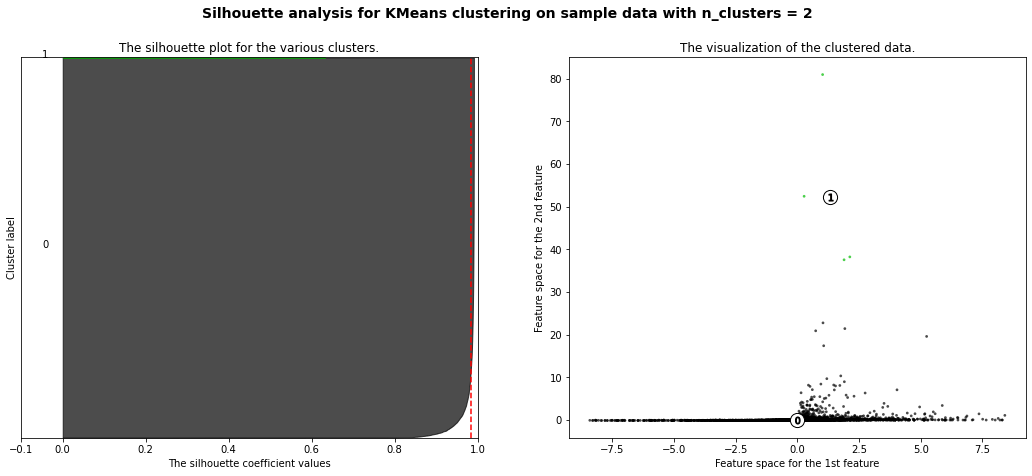

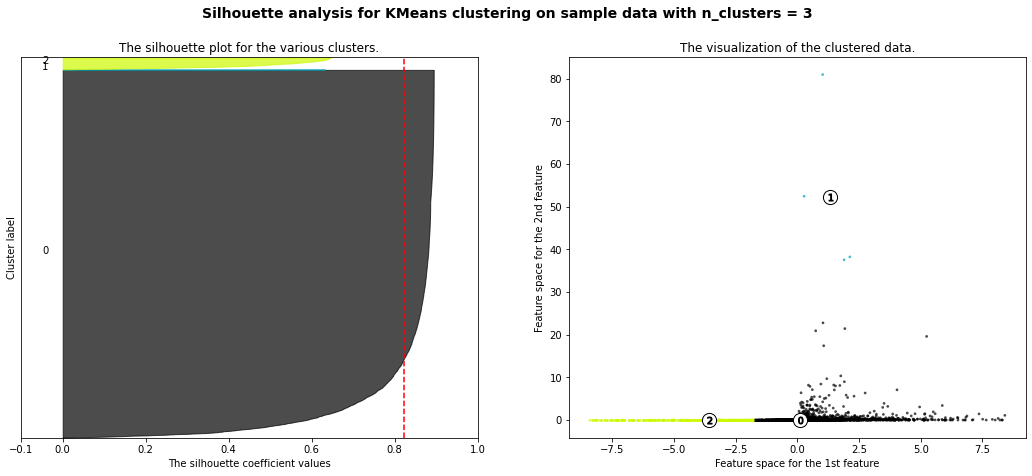

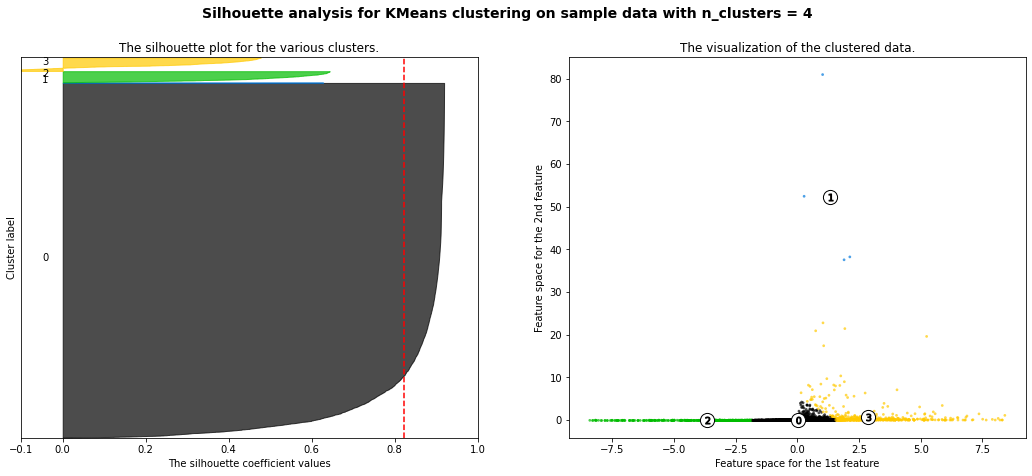

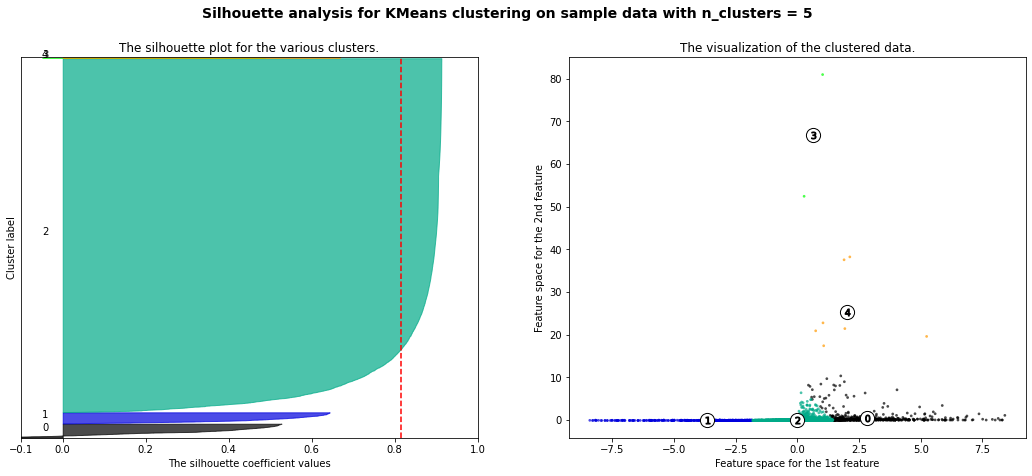

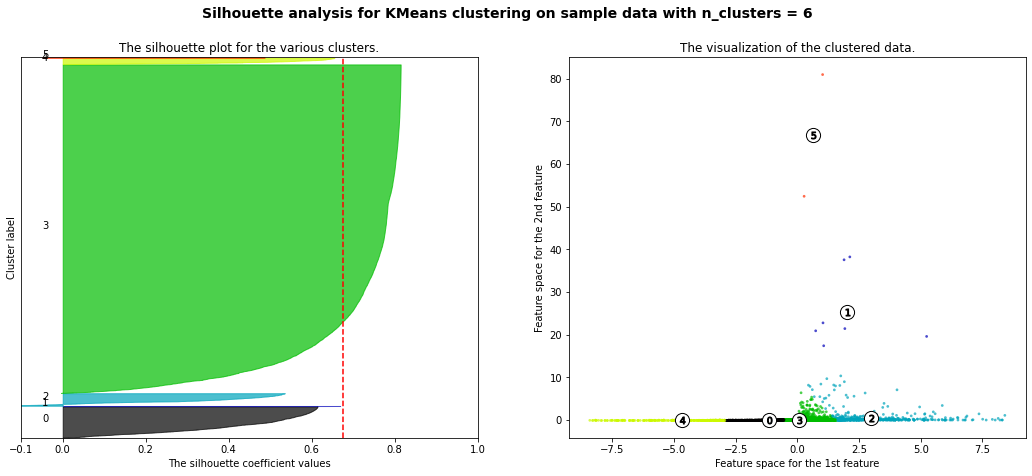

In [77]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_features_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_features_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_features_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_features_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_features_df.iloc[:, 0], scaled_features_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [85]:
# k = 4
model = KMeans(n_clusters=4)
# fit the model
model.fit(scaled_features_df)
# assign a cluster to each example
yhat = model.predict(scaled_features_df)
# retrieve unique clusters
clusters = unique(yhat)

In [87]:
data1['Cluster(KMeans)']=yhat

In [91]:
data1['AISLE']=data1['AISLE'].astype(str)

In [95]:
contingency = pd.crosstab(data1['Cluster(KMeans)'], data1['CAT']) 
contingency

CAT,CAT1,CAT10,CAT11,CAT12,CAT14,CAT15,CAT16,CAT17,CAT2,CAT3,CAT4,CAT5,CAT6,CAT7,CAT8,CAT9
Cluster(KMeans),,,,,,,,,,,,,,,,
0,134,238,1,2319,1768,82,2355,3880,185,480,93,176,7,1165,2120,159
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,0
2,6,6,0,107,179,1,43,38,2,18,7,12,0,28,57,0
3,6,7,0,131,192,0,56,70,3,21,4,12,0,29,42,1


In [96]:
data1['CAT'] = data1['CAT'] + "-" + data1['ABC']

In [97]:
contingency = pd.crosstab(data1['Cluster(KMeans)'], data1['CAT']) 
contingency

CAT,CAT1-A,CAT1-B,CAT1-C,CAT10-A,CAT10-B,CAT10-C,CAT11-C,CAT12-A,CAT12-B,CAT12-C,CAT14-A,CAT14-B,CAT14-C,CAT15-A,CAT15-B,CAT15-C,CAT16-A,CAT16-B,CAT16-C,CAT17-A,CAT17-B,CAT17-C,CAT2-A,CAT2-B,CAT2-C,CAT3-A,CAT3-B,CAT3-C,CAT4-A,CAT4-B,CAT4-C,CAT5-A,CAT5-B,CAT5-C,CAT6-A,CAT6-B,CAT6-C,CAT7-A,CAT7-B,CAT7-C,CAT8-A,CAT8-B,CAT8-C,CAT9-A,CAT9-B,CAT9-C
Cluster(KMeans),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,53,46,35,56,35,147,1,1500,347,472,1144,214,410,27,4,51,1044,633,678,1021,1285,1574,2,21,162,221,69,190,39,27,27,89,42,45,1,4,2,196,197,772,847,388,885,21,24,114
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2,3,2,1,4,0,2,0,74,15,18,172,4,3,0,1,0,27,4,12,12,10,16,1,1,0,13,0,5,7,0,0,11,1,0,0,0,0,16,6,6,37,13,7,0,0,0
3,4,1,1,5,0,2,0,95,14,22,184,5,3,0,0,0,35,11,10,32,17,21,1,0,2,19,0,2,4,0,0,11,1,0,0,0,0,17,7,5,28,7,7,0,0,1


In [92]:
# Revisar clusters 2 y 3
data1[data1['Cluster(KMeans)']==2].describe()

,COSTX,QTYVAR,CONTRPERC,Cluster(KMeans)
count,504.000000,504.000000,504.000000,504.0
mean,-17078.983748,-77.898552,0.596071,2.0
std,7836.113614,28.514399,1.120521,0.0
min,-40013.935000,-100.000000,0.000000,2.0
25%,-21317.309500,-100.000000,0.010000,2.0
50%,-14589.199300,-100.000000,0.090000,2.0
75%,-10964.310725,-50.905000,0.750000,2.0
max,-8364.548600,1.000000,4.630000,2.0


In [93]:
# Revisar clusters 2 y 3
data1[data1['Cluster(KMeans)']==3].describe()

,COSTX,QTYVAR,CONTRPERC,Cluster(KMeans)
count,574.000000,574.000000,574.000000,574.0
mean,13494.897538,712.743258,0.553624,3.0
std,7050.888279,2187.680710,1.114624,0.0
min,567.518600,-100.000000,0.000000,3.0
25%,8355.194500,1.000000,0.010000,3.0
50%,11330.987700,77.245000,0.060000,3.0
75%,17034.925725,317.462500,0.675000,3.0
max,39709.661400,20800.000000,4.630000,3.0
